<a href="https://colab.research.google.com/github/Sharon-Faith/autolib_2/blob/main/Autolib_proj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction


**Problem Statement**

> The aim of the study is to determine whether the average number of blue cars taken (provided by Autolib company) during weekends in the 9th-20th arrondissements of Paris is greater than the average number taken in the 1st-8th arrondissements during the weekend.

NB: 'Arrondissement' == District

**Why**

> The average population in the 9th-20th arrondissements is greater than that in the first 8. Our assumption would therefore be that more people in these areas are hiring the electric vehicles. However, the first 8 arrondissements have the most major tourist attractions, many businesses (including major retail centres and restaurants), and a lot of entertainment activities, so it may be possible that more people are hiring the electric  vehicles in those areas, especially during weekends.Varying economic status by district can also affect our assumption (many of the higher average wage arrondissements are between 1-8). Investigating whether our claim/assumption (that the average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris is greater than that of the 1st-8th arrondissements) is actually true (backed by statistical evidence) will help in accurately informing Autolib's strategies of resource distribution across the different districts on weekends.

> (Reference links for information on arrondissements (districts) in Paris: [link1](https://shewandersabroad.com/best-arrondissements-to-stay-in-paris/), [link2](https://www.parisinsidersguide.com/paris-arrondissements.html), [link3](https://www.statista.com/statistics/1046193/population-by-district-arrondissements-paris-france/), [link4]( https://www.lonelyplanet.com/articles/guide-paris-arrondissements), [link5]( http://blog.lodgis.com/en/business-districts-convention-centers-paris-region/)

**Experimental Design**
*   Set the main objective.
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates and determine how deal with them, perform relevant datatype conversion.
*    Analyse the dataset using univariate, bivariate analysis techniques.
*   Implement the solution using hypothesis testing methods.
*   Conclusions and recommendations.

## 2. Reading the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the Data 

df= pd.read_csv('autolib_daily_events_postal_code.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape
# The dataset has 16085 rows and 13 columns

(16085, 13)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
df[['BlueCars_taken_sum',	'BlueCars_returned_sum',	'Utilib_taken_sum',	'Utilib_returned_sum',	'Utilib_14_taken_sum',	'Utilib_14_returned_sum',	'Slots_freed_sum',	'Slots_taken_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## 4. Tidying the Dataset

In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# #dropping unnecessary columns

# df.drop(columns=['year', 'uniqueid'], inplace=True)


In [ ]:
# Identifying missing data
#
df.isnull().sum()
#There were no columns with missing values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#Checking for duplicates
df.duplicated().sum()
#there were no duplicates found in the dataset

0

In [ ]:
df.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
# standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head(1)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

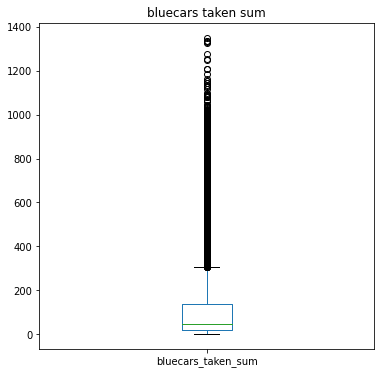

****************************************************


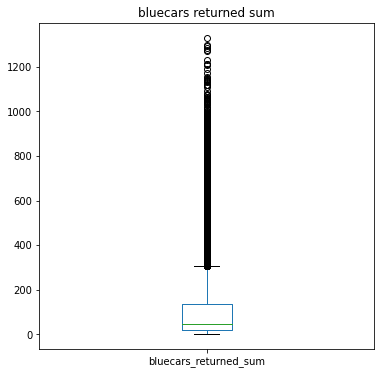

****************************************************


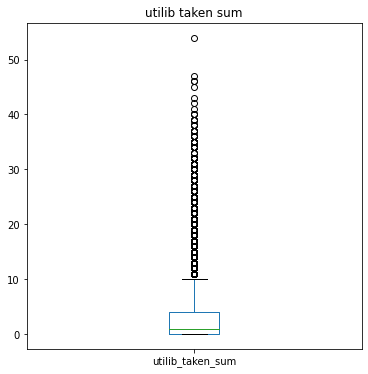

****************************************************


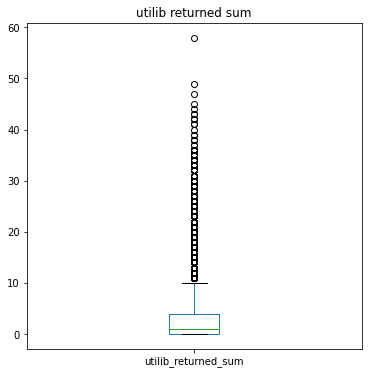

****************************************************


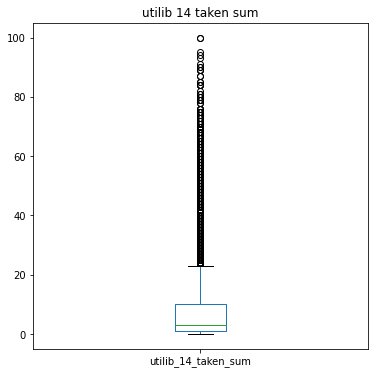

****************************************************


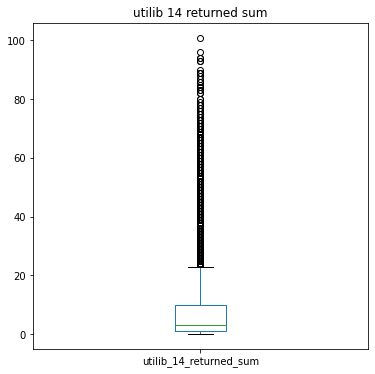

****************************************************


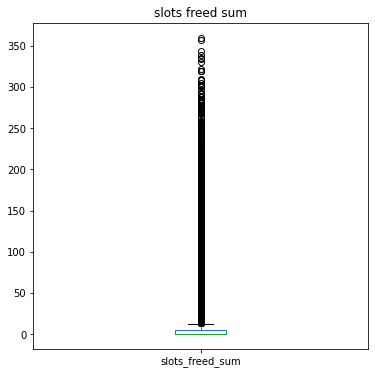

****************************************************


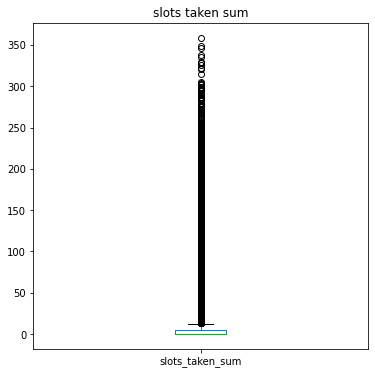

****************************************************


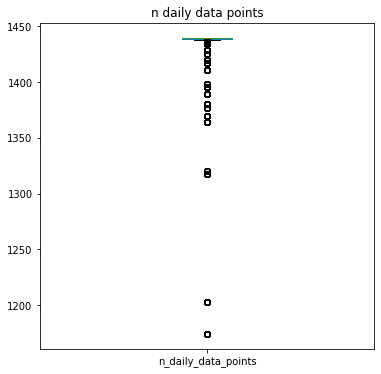

****************************************************


In [ ]:
# Checking for Outliers in originally numerical columns
#
cols = ['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'n_daily_data_points']

for col in cols:
  df.boxplot(col, grid=False)
  plt.title(col.replace('_', ' '))
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')
  


There are outliers in all the following columns: n_daily_data_points, bluecars_taken_sum, bluecars_returned_sum, utilib_taken_sum, utilib_returned_sum, utilib_14_taken_sum, utilib_14_returned_sum, slots_freed_sum, and slots_taken_sum.

The outliers will not be dropped because these columns relate to usage of the electric car service and due to factors like day of the week, date, season, events, among others, it is expected that on various days more cars than usual are being hired.

In [ ]:
# Checking for Anomalies

In [ ]:
# checking if any French postal code has a length greater than 5 digits

unusual_postal = []
for index, code in enumerate(list(df['postal_code'])):
  if len(str(code)) != 5:
    unusual_postal.append((True, code))
print(unusual_postal)
# there was no postal code with an unusual number of digits  

[]


In [ ]:
#checking if any day of the week value is greater than 6  or less than 0
df['dayofweek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
#checking if any day type is different from weekday or weekend
df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayofweek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
df['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [ ]:
#converting date column to datetime object

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

## 5. Exploratory Analysis

###Univariate Analysis

#### Bluecars taken

In [ ]:

df['bluecars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

* The mean number of blue cars taken per day according to the entire dataset is approximately 125.
* The standard deviation is approximately 185
* The minimum cars taken per day - 0.
* The first quartile is 20 cars
* The median is 46 cars
* The third quartile is 135 cars
* The maximum number of cars taken in a day is 1352

In [ ]:
#range of bluecars taken per day
df['bluecars_taken_sum'].max() - df['bluecars_taken_sum'].min()

1352

In [ ]:

df['bluecars_taken_sum'].kurt()
# the kurtosis is greater than 3 (leptokurtic), indicates heavy tails-many outliers

6.172692305510042

In [ ]:
df['bluecars_taken_sum'].skew()
# the data is positively skewed (to the right)

2.4063548974959086

Text(0, 0.5, 'Frequency')

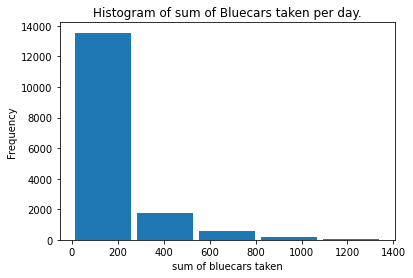

In [ ]:
df['bluecars_taken_sum'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of sum of Bluecars taken per day.')
plt.xlabel('sum of bluecars taken')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df['bluecars_taken_sum'].max() - df['bluecars_taken_sum'].min())/5
lower_lim = int(df['bluecars_taken_sum'].min())
upper_lim = int(df['bluecars_taken_sum'].min() +bin_width*1)
print(f'On most days the sum of bluecars taken was between {lower_lim} to {upper_lim}')

On most days the sum of bluecars taken was between 0 to 270


#### Bluecars returned

In [ ]:

df['bluecars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

* The mean number of blue cars returned per day according to the entire dataset is approximately 125.
* The standard deviation is approximately 185
* The minimum cars returned per day - 0.
* The first quartile is 20 cars
* The median is 46 cars
* The third quartile is 135 cars
* The maximum number of cars taken in a day is 1332

In [ ]:
#range of bluecars returned (per day)
df['bluecars_returned_sum'].max() - df['bluecars_returned_sum'].min()

1332

In [ ]:

df['bluecars_returned_sum'].kurt()
# the kurtosis is greater than 3 (leptokurtic), indicates heavy tails-many outliers

6.1862880957582345

In [ ]:
df['bluecars_returned_sum'].skew()
# the data is positively skewed (to the right)

2.412084978838923

Text(0, 0.5, 'Frequency')

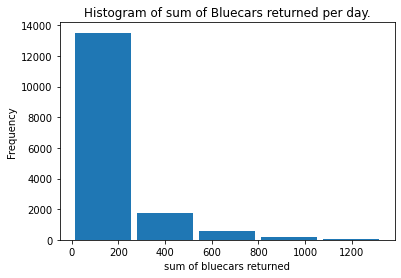

In [ ]:
df['bluecars_returned_sum'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of sum of Bluecars returned per day.')
plt.xlabel('sum of bluecars returned')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df['bluecars_returned_sum'].max() - df['bluecars_returned_sum'].min())/5
lower_lim = int(df['bluecars_returned_sum'].min())
upper_lim = int(df['bluecars_returned_sum'].min() +bin_width*1)
print(f'On most days the sum of bluecars returned was between {lower_lim} to {upper_lim}')

On most days the sum of bluecars returned was between 0 to 266


#### Utilibs taken

In [ ]:

df['utilib_taken_sum'].describe()

count    16085.000000
mean         3.698290
std          5.815058
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         54.000000
Name: utilib_taken_sum, dtype: float64

* The mean number of utilib taken per day according to the entire dataset is approximately 3.
* The standard deviation is approximately 5
* The minimum utilibs taken per day - 0.
* The first quartile is 0 utilibs
* The median is 1 utilib
* The third quartile is 4 utilibs
* The maximum number of utilibs taken in a day is 54

In [ ]:
#range of utilibs taken(per day)
df['utilib_taken_sum'].max() - df['utilib_taken_sum'].min()

54

In [ ]:

df['utilib_taken_sum'].kurt()
# the kurtosis is greater than 3 (leptokurtic), indicates heavy tails-many outliers

7.702361895243428

In [ ]:
df['utilib_taken_sum'].skew()
# the data is positively skewed (to the right)

2.5568719194754777

Text(0, 0.5, 'Frequency')

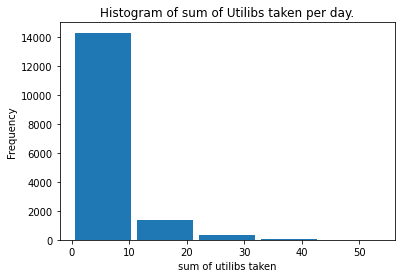

In [ ]:
df['utilib_taken_sum'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of sum of Utilibs taken per day.')
plt.xlabel('sum of utilibs taken')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df['utilib_taken_sum'].max() - df['utilib_taken_sum'].min())/5
lower_lim = int(df['utilib_taken_sum'].min())
upper_lim = int(df['utilib_taken_sum'].min() +bin_width*1)
print(f'On most days the number of utilibs taken was between {lower_lim} to {upper_lim}')

On most days the number of utilibs taken was between 0 to 10


#### Utilib 14 taken

In [ ]:

df['utilib_14_taken_sum'].describe()

count    16085.000000
mean         8.600560
std         12.870098
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        100.000000
Name: utilib_14_taken_sum, dtype: float64

* The mean number of utilib 14 taken per day according to the entire dataset is approximately 8.
* The standard deviation is approximately 12
* The minimum utilibs taken per day - 0.
* The first quartile is 1 utilib
* The median is 3 utilibs
* The third quartile is 10 utilibs
* The maximum number of utilibs taken in a day is 100

In [ ]:
#range of utilib 14 taken(per day)
df['utilib_14_taken_sum'].max() - df['utilib_taken_sum'].min()

100

In [ ]:

df['utilib_14_taken_sum'].kurt()
# the kurtosis is greater than 3 (leptokurtic), indicates heavy tails-many outliers

7.18681525579947

In [ ]:
df['utilib_14_taken_sum'].skew()
# the data is positively skewed (to the right)

2.5109244534822923

Text(0, 0.5, 'Frequency')

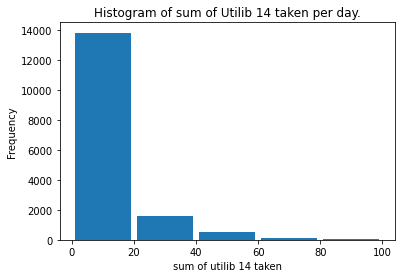

In [ ]:
df['utilib_14_taken_sum'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of sum of Utilib 14 taken per day.')
plt.xlabel('sum of utilib 14 taken')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df['utilib_14_taken_sum'].max() - df['utilib_14_taken_sum'].min())/5
lower_lim = int(df['utilib_14_taken_sum'].min())
upper_lim = int(df['utilib_14_taken_sum'].min() +bin_width*1)
print(f'On most days the number of utilib 14 taken was between {lower_lim} to {upper_lim}')

On most days the number of utilib 14 taken was between 0 to 20


#### Day of week

In [ ]:
#0-Monday, 1-Tuesday, 2-Wednesday,3 - Thursday, 4-Friday, 5-Saturday, 6-Sunday

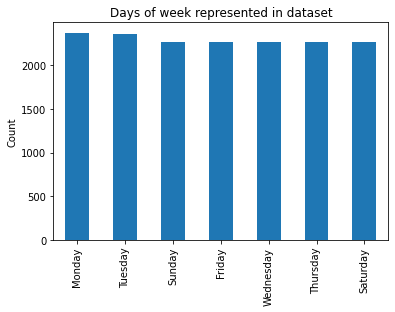

In [ ]:
df_wkday_name = df.copy()
df_wkday_name['dayofweek'] = df['dayofweek'].replace({0: 'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

df_wkday_name['dayofweek'].value_counts().plot.bar()
plt.title('Days of week represented in dataset')
# plt.xticks(ticks=[0, 1], labels=['rural', 'urban'])
plt.ylabel('Count')
plt.show()

The different days of the week are almost equally represented in the dataset.

### Bivariate analysis

Main column of interest:
* Sum(Number) of bluecars taken per date

#### Number of bluecars per month

In [ ]:
#compare by month

In [ ]:
df['month'] = df['date'].dt.month
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,1
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,1
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,1
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,1
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,1


In [ ]:
df['month'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
# df['month'] = df['month'].replace({1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'})


In [ ]:
df_month= df.groupby('month')['bluecars_taken_sum'].sum().reset_index()

In [ ]:
df_month

,month,bluecars_taken_sum
0,1,403174
1,2,309708
2,3,405231
3,4,385103
4,5,264814
5,6,257505


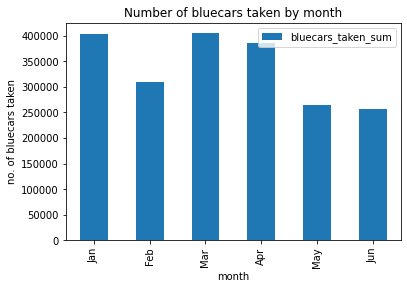

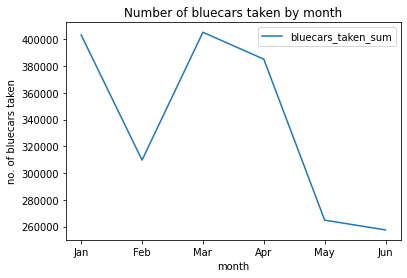

In [ ]:
types = ['bar', 'line']
for typ in types:
  df_month.plot(x='month', y='bluecars_taken_sum', kind=typ)

  plt.xlabel('month')
  plt.ylabel('no. of bluecars taken')
  if typ == 'bar':
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'])
  else:
    plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun'])
  plt.title('Number of bluecars taken by month')
  plt.show()


January and March are the months with the highest numbers of bluecars taken. June had the lowest numbers.

#### Num of bluecars by day of week

In [ ]:
df_week= df.groupby('dayofweek')['bluecars_taken_sum'].sum().reset_index()

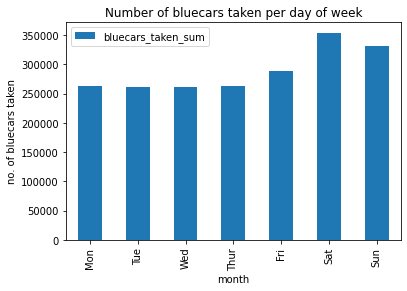

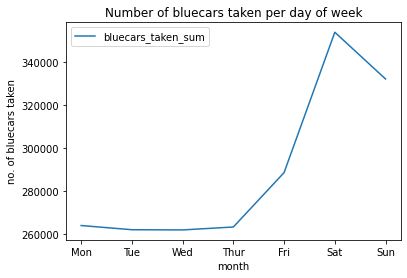

In [ ]:
types = ['bar', 'line']
for typ in types:
  df_week.plot(x='dayofweek', y='bluecars_taken_sum', kind=typ)

  plt.xlabel('month')
  plt.ylabel('no. of bluecars taken')
  if typ == 'bar':
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5,6], labels=['Mon', 'Tue', 'Wed','Thur', 'Fri', 'Sat', 'Sun'])
  else:
    plt.xticks(ticks=[0,1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed','Thur', 'Fri', 'Sat', 'Sun'])
  plt.title('Number of bluecars taken per day of week')
  plt.show()



Saturdays have the highest number of blue cars taken 

#### correlation

In [ ]:
df.dtypes

postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                          int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
month                              int64
dtype: object

In [ ]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum', 'month'],
      dtype='object')

In [ ]:
cols = ['date', 'day_type']
df_2 = df.copy()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in cols:
  df_2[col] = enc.fit_transform(df_2[col])
df_2.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,75001,0,1440,0,0,110,103,3,2,10,9,22,20,1
1,75001,1,1438,1,0,98,94,1,1,8,8,23,22,1
2,75001,2,1439,2,0,138,139,0,0,2,2,27,27,1
3,75001,3,1320,3,0,104,104,2,2,9,8,25,21,1
4,75001,4,1440,4,0,114,117,3,3,6,6,18,20,1


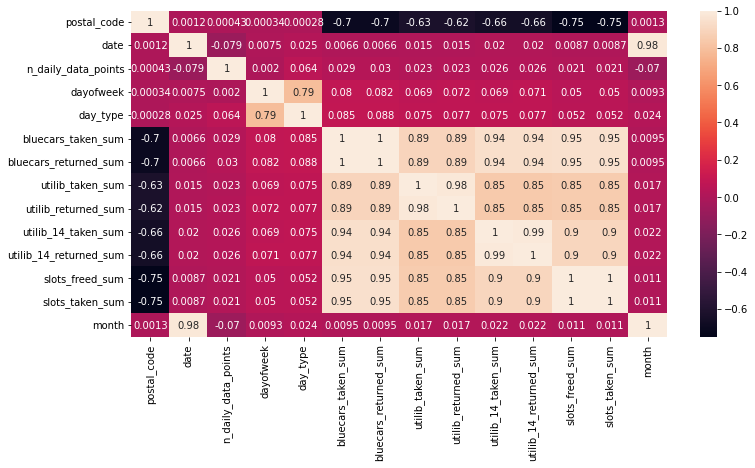

In [ ]:
sns.heatmap(df_2.corr(),annot=True)
plt.gcf().set_size_inches(12,6)
plt.show()

The number of blue cars taken is our main column of interest. It is highly positively correlated with blue cars returned, followed by slots freed and taken, then utilibs taken and returned. 

It has a strong negative correlation with the postal code (which each represent a particular area)

##  6. Implementing the Solution  (Hypothesis testing)

Claim: The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris is greater than the average number taken in the 1st-8th arrondissements during weekends.

#### Sampling

We will select our samples of interest from Autolib dataset (has various dates from January to June 2018) using purposive sampling. This is because our research questions specifically entail investigating arrondissements in Paris during the weekends, so our samples will have those specific features. 

In [ ]:
#seeing the unique postal codes
df.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

Postal codes in France - 5 digits. For Paris, the first 2 digits are 75 , followed by 3 digits that specify the arrondissement ( [postcode prefixes](https://www.parcelforce.com/sites/default/files/FR%20Postcodes%20Jan20%20v1%20020120_0.pdf), [arrondissements](https://www.worldpostalcodes.org/en/france/arrondissement/map-of-postal-codes-in-paris)).

In [ ]:
#isolating indexes of postal codes that fit the above description
indexes=[]
for index, x in enumerate(list(df.postal_code)):
  if x in range(75000, 76000):
    indexes.append(index)

In [ ]:
#the paris sample
df_par = df.loc[indexes, :]
df_par

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,1
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,1
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,1
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,1
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,75116,2018-06-14,1439,3,weekday,8,7,0,0,0,0,4,3,6
3427,75116,2018-06-15,1440,4,weekday,17,14,0,0,0,0,8,8,6
3428,75116,2018-06-16,1440,5,weekend,14,18,0,0,0,0,4,5,6
3429,75116,2018-06-17,1440,6,weekend,11,9,0,0,1,1,4,3,6


In [ ]:
#checking that only Paris postal codes are in new dataframe
df_par.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116])

In [ ]:
#isolating the weekends only
df_weekend = df_par[df_par['day_type'] == 'weekend']
df_weekend

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35,1
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34,1
12,75001,2018-01-13,1440,5,weekend,224,223,2,2,15,15,38,38,1
13,75001,2018-01-14,1440,6,weekend,193,193,2,2,12,12,22,20,1
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,75116,2018-06-03,1440,6,weekend,7,8,0,0,0,0,0,0,6
3421,75116,2018-06-09,1440,5,weekend,11,11,2,2,1,1,5,5,6
3422,75116,2018-06-10,1440,6,weekend,13,14,2,1,3,4,3,3,6
3428,75116,2018-06-16,1440,5,weekend,14,18,0,0,0,0,4,5,6


In [ ]:
#checking that only weekends are included
df_weekend['day_type'].unique()

array(['weekend'], dtype=object)

In [ ]:
df_weekend = df_weekend.reset_index()
df_weekend.head(1)

,index,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35,1


In [ ]:
df_weekend.drop(columns = ['index'], inplace=True)

In [ ]:
df_weekend.head(1)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35,1


In [ ]:
df_weekend.shape

(968, 14)

In [ ]:
df_weekend.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116])

In [ ]:
#isolating the indexes for the first to eighth, and ninth to 20th arrondissements to make the samples
indexes_samp2 = []
indexes_samp1 = []

for index, x in enumerate(list(df_weekend.postal_code)):
  if x in range(75001, 75009):
    indexes_samp2.append(index)
  else:
    indexes_samp1.append(index)

In [ ]:
#creating the samples
samp1 = df_weekend.loc[indexes_samp1, :]
samp1

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
352,75009,2018-01-06,1437,5,weekend,433,455,14,15,34,35,92,100,1
353,75009,2018-01-07,1440,6,weekend,394,398,9,12,19,16,83,81,1
354,75009,2018-01-13,1440,5,weekend,524,521,10,10,35,36,122,127,1
355,75009,2018-01-14,1440,6,weekend,397,423,9,10,31,33,97,99,1
356,75009,2018-01-20,1439,5,weekend,503,517,7,7,28,28,121,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,75116,2018-06-03,1440,6,weekend,7,8,0,0,0,0,0,0,6
964,75116,2018-06-09,1440,5,weekend,11,11,2,2,1,1,5,5,6
965,75116,2018-06-10,1440,6,weekend,13,14,2,1,3,4,3,3,6
966,75116,2018-06-16,1440,5,weekend,14,18,0,0,0,0,4,5,6


In [ ]:
#confirming only arrondissements 9-20 reperesented in first sample
samp1.postal_code.unique()

array([75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017,
       75018, 75019, 75020, 75112, 75116])

In [ ]:
samp2 = df_weekend.loc[indexes_samp2, :]
samp2.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
0,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35,1
1,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34,1
2,75001,2018-01-13,1440,5,weekend,224,223,2,2,15,15,38,38,1
3,75001,2018-01-14,1440,6,weekend,193,193,2,2,12,12,22,20,1
4,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39,1


In [ ]:
#confirming only arrondissements 1-8 in second sample
samp2.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008])

In [ ]:
print(samp1.shape,
samp2.shape)

(616, 14) (352, 14)


#### 1. Stating the null and alternative hypothesis

**Null hypothesis**

Ho : u1 <= u2

The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is less than or equal to the average number taken in the 1st-8th arrondissements during weekends (u2).

**Alternative hypothesis**

Ha : u1 > u2 (claim)

The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is greater than the average number taken in the 1st-8th arrondissements (u2) during weekends.

#### 2. Setting the significance level 

The significance level a = 0.05. If the probability of the null hypothesis being true falls below this level the null is rejected.

#### 3. Calculating the test statistic and corresponding p value

##### Claim

Claim: The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris is greater than the average number taken in the 1st-8th arrondissements during the weekend.

##### Choosing test statistic (why)

We are comparing 2 samples and do not have the true population standard deviations (for our claim, the population standard deviations would be obtained by having data for all weekends since the time Autolib was launched  - not available). Despite sample sizes > 30, lack of the population standard deviations allows for the t statistic to be used (reference - [here](https://www.statskingdom.com/doc_t_test_z_test.html#:~:text=Z%2DTest%20or%20T%2Dtest,should%20use%20the%20T%2Dtest.&text=Usually%2C%20we%20don't%20have,we%20use%20the%20T%2Dtest.)). Therefore, we will be using the independent samples t-test.

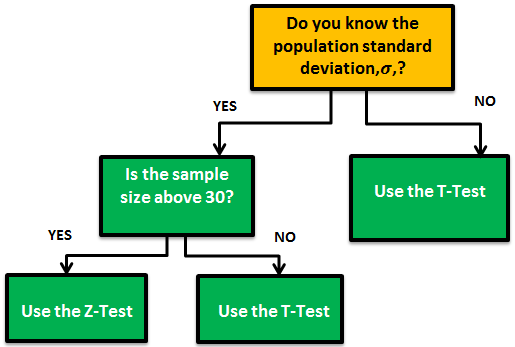


Assumptions for independent t test: 
 * Common variance
 * Independence of samples
 * Normality

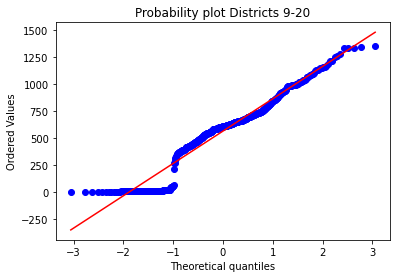

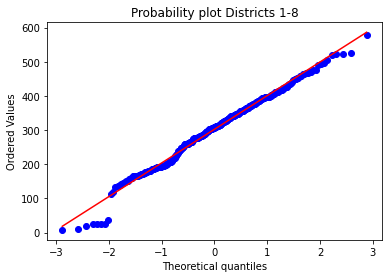

In [ ]:
#testing for normality
samples = [samp1, samp2]
for samp in samples:
  from scipy.stats import probplot
  import matplotlib.pyplot as plt
  probplot(samp['bluecars_taken_sum'], plot = plt)
  if samp['bluecars_taken_sum'].mean() == samp1['bluecars_taken_sum'].mean():
    plt.title('Probability plot Districts 9-20')
  else:
    plt.title('Probability plot Districts 1-8')
  plt.show()

The samples both have normal distributions despite some outliers.

In [ ]:
# !pip uninstall scipy

Found existing installation: scipy 1.4.1
Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1


In [ ]:
# !pip install scipy

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import scipy

In [ ]:
scipy.__version__

'1.7.3'

In [ ]:
from scipy import stats

##### Long calculation test statistic

In [ ]:
samp1['bluecars_taken_sum'].mean()

564.1412337662338

In [ ]:
std_1 = samp1['bluecars_taken_sum'].std()
std_1

307.0238589088613

In [ ]:
samp2['bluecars_taken_sum'].mean()

302.4176136363636

In [ ]:
std_2 = samp2['bluecars_taken_sum'].std()
std_2

98.47060693230586

In [ ]:
print(samp1.shape, samp2.shape)

(616, 14) (352, 14)


In [ ]:
mean_diff = samp1['bluecars_taken_sum'].mean() - samp2['bluecars_taken_sum'].mean()

In [ ]:
mean_diff

261.72362012987014

In [ ]:
#pooled variance
pooled_var = (((616-1)*std_1**2) + ((352-1)*std_2**2))/(616+352-2)
pooled_var

63535.82021061885

In [ ]:
pooled_var**0.5

252.06312743163932

In [ ]:
#t statistic
import math
t_stat = mean_diff/math.sqrt(pooled_var*((1/352)+(1/616)))
t_stat
#t statistic is 15.54..

15.540235916778126

##### P calculation

In [ ]:
#Calculating the value of p
prob = scipy.stats.t.sf(abs(t_stat), df=966)
prob
#p is 4.453e-49

4.453152629351808e-49

##### Using scipys method - shortcut

In [ ]:
#t test of independence. alternative=greater indicates that we want to perform a
#test where the mean of first sample > mean of second, the condition which is our claim
#, hence a right tailed test
stats.ttest_ind(samp1['bluecars_taken_sum'], samp2['bluecars_taken_sum'], alternative='greater')

Ttest_indResult(statistic=15.540235916778126, pvalue=4.453152629351808e-49)

The results found are the same as long calculation

##### Values

The t statistic was determined to be 15.54. 

The p value was determined to be 4.453e-49 (very small)

#### 4. Drawing the conclusion

##### Conclusion

Given that our p value is 4.453e-49, which is much smaller than our significance level of 0.05, there is very strong evidence for rejecting our null hypothesis (Ho : u1 <= u2 - The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is less than or equal to the average number taken in the 1st-8th arrondissements during the weekend (u2)). 

Therefore, **we conclude that the alternative hypothesis**, which was our original claim, **is true** at a level of significance of 0.05:

Ha : u1 > u2 (claim)

The average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is greater than the average number taken in the 1st-8th arrondissements (u2) during the weekend.

##### Potential errors

**Type I error:**

* Rejecting the null hypothesis when it is true. In this study, that would mean accepting that the average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is greater than that in the 1st-8th arrondissements (u2) during the weekend, while it is not the case. The probability of commiting this error in this study is the significance level a (0.05).

**Type II error:**

* Accepting the null hypothesis when it is false. In this study, that would mean accepting that the average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris (u1) is less than or equal to that in the 1st-8th arrondissements (u2) while it is not the case.

#### Recommendation

Our claim that the average number of blue cars taken during weekends in the 9th-20th arrondissements of Paris is greater than the average number taken in the 1st-8th arrondissements during the weekend was proven to be true.

Therefore, we recommend that more of the Autolib company resources (charging slots, cars, personnel) be made available over the weekend in the 9th to 20th arrondisments as opposed to in the first 8 -- despite the popularity of the latter for business, tourism and entertainment -- because more cars are hired per day in these regions.

